In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})

In [2]:
path = os.getcwd().strip('Bayes')+'Fetch Data/datasets/'

df = pd.read_csv(path+'pitchSpeed_spinRate.csv')
print(df.shape)

df.head()

(1910986, 3)


,endSpeed,spinRate,pitchType
0,87.7,1926.0,Four-Seam Fastball
1,89.0,1872.0,Four-Seam Fastball
2,83.9,1661.0,Changeup
3,88.3,1934.0,Two-Seam Fastball
4,88.9,1997.0,Four-Seam Fastball


In [3]:
df.dropna(inplace=True)

In [4]:
# drop outlier pitch types
pitchTypes_toDrop = ['Automatic Ball','Pitchout','Eephus']

i = df[df['pitchType'].isin(pitchTypes_toDrop)].index
df.drop(index=i,inplace=True)

# # drop outlier pitch speeds
# i = df[df['endSpeed']<df['endSpeed'].quantile(.001)].index
# df.drop(index=i,inplace=True)

In [5]:
df.shape

(1846200, 3)

### Check for Normality

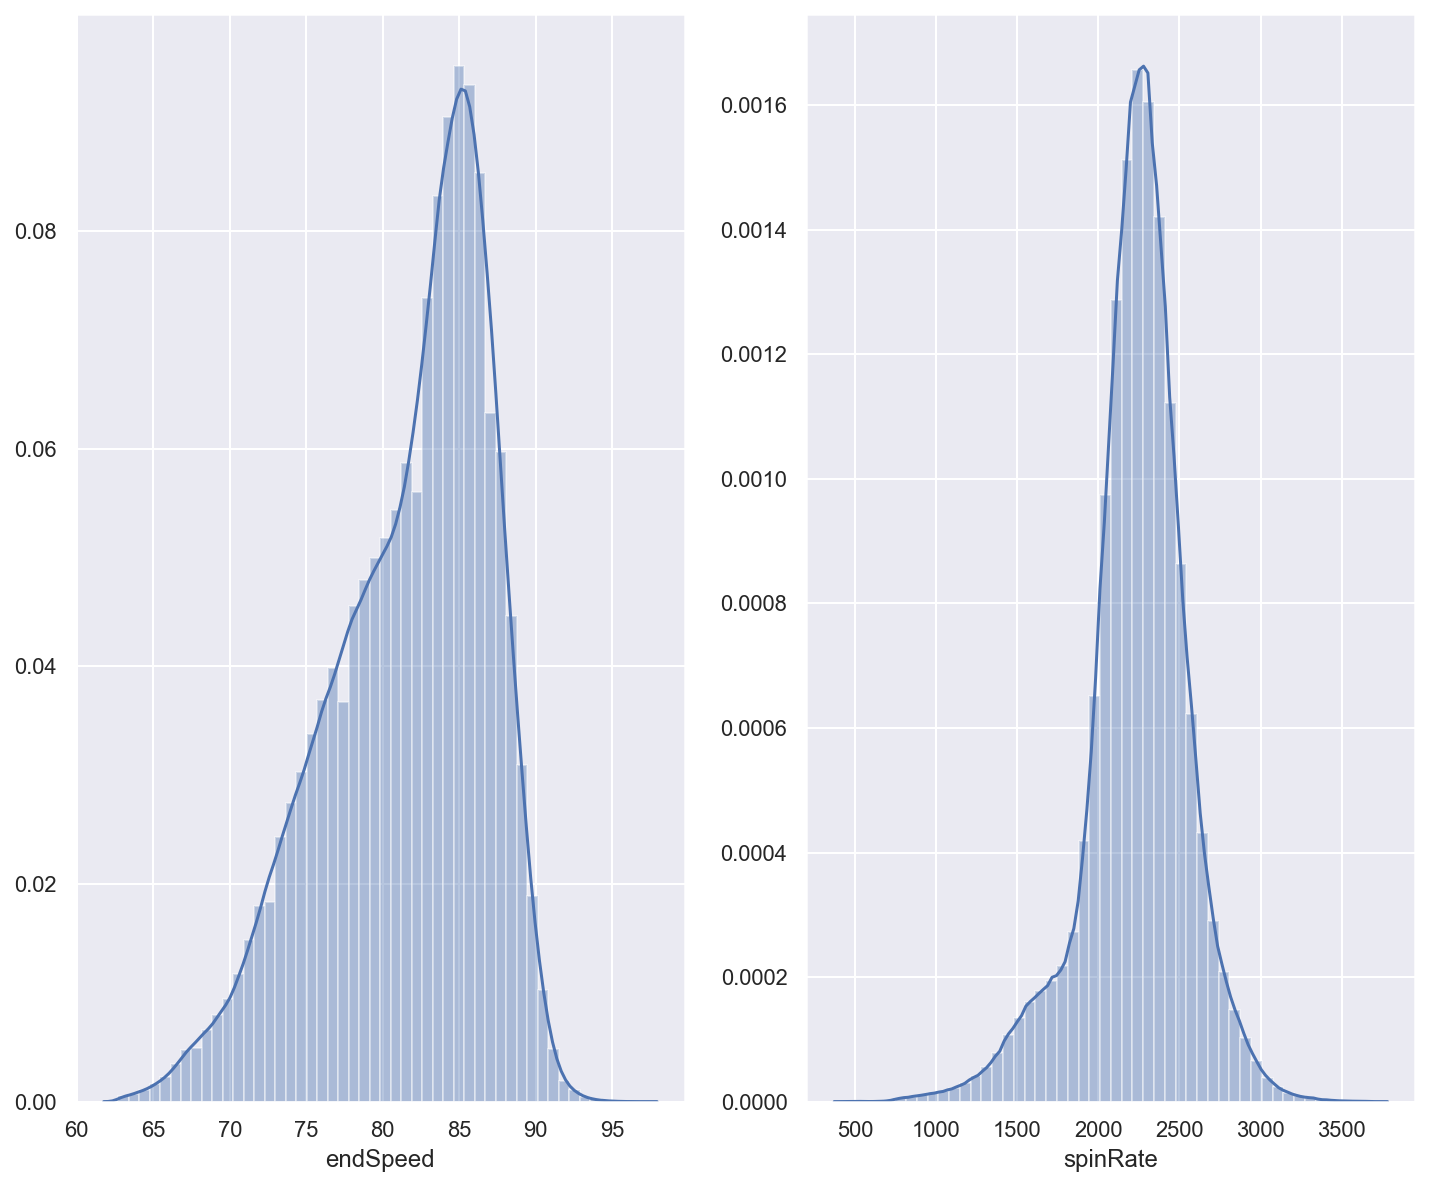

In [6]:
f, axes = plt.subplots(1,2)
sns.distplot(df['endSpeed'],ax=axes[0])
sns.distplot(df['spinRate'],ax=axes[1])

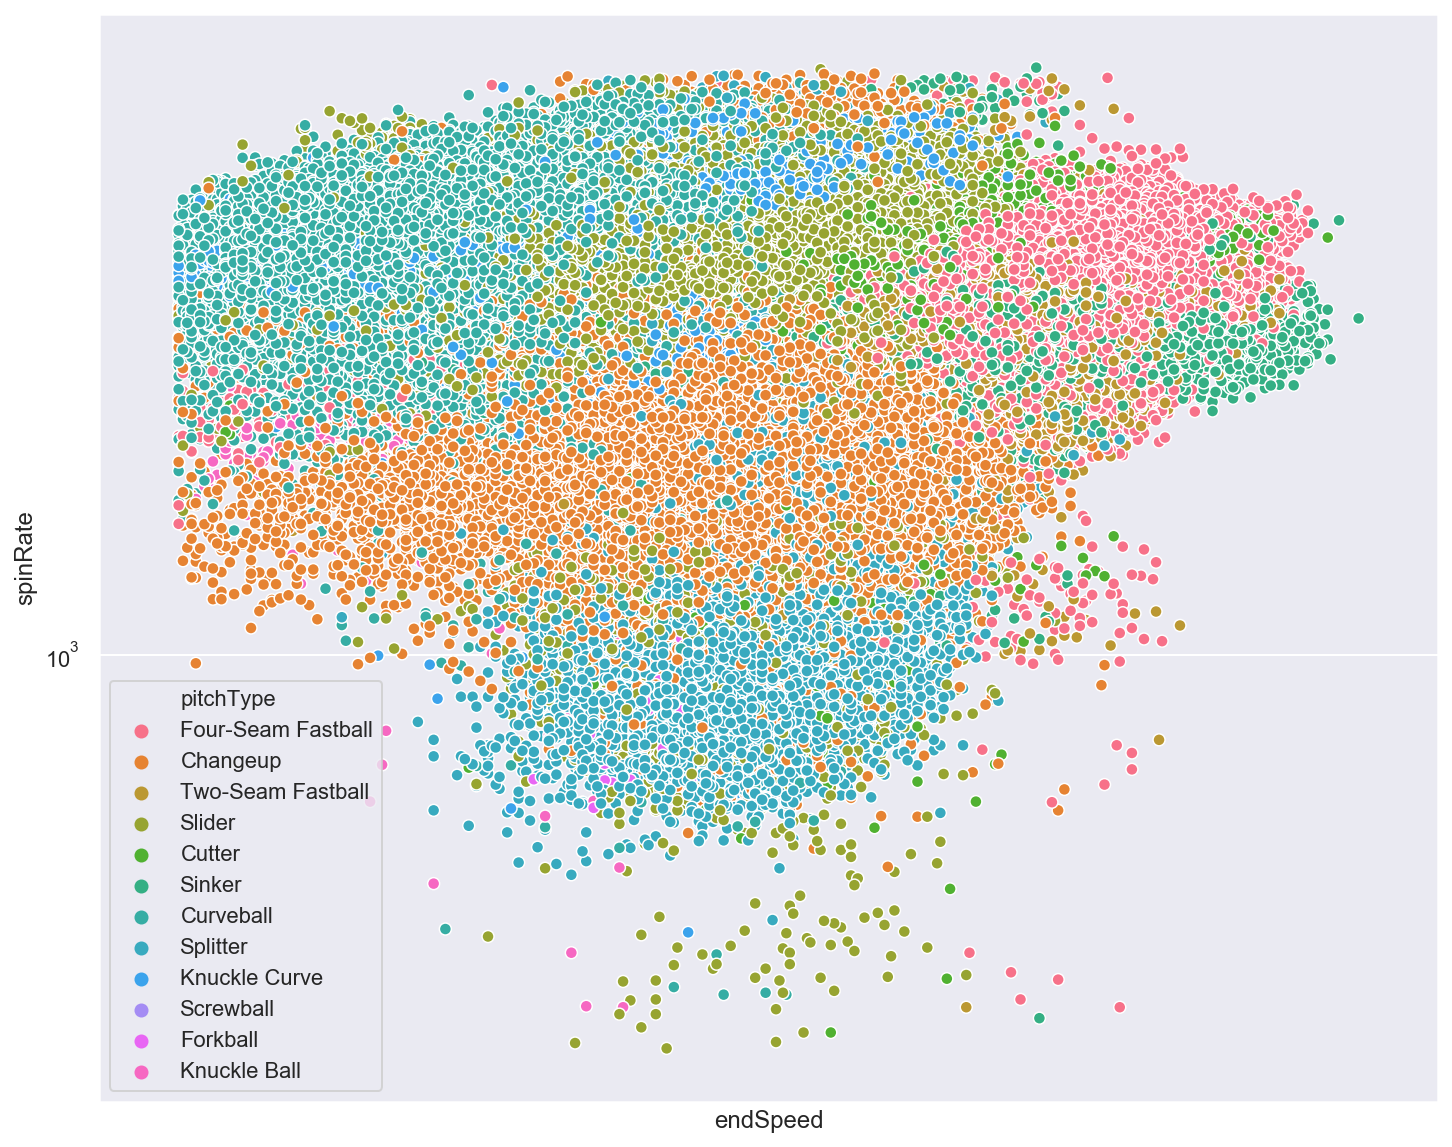

In [8]:
fig, ax = plt.subplots()
ax.set(xscale='symlog',yscale='symlog')
sns.scatterplot(x=df['endSpeed'],y=df['spinRate'],hue=df['pitchType'])

#### Build a Bayes Classifier with Numpy
- A 'fit' method needs to calculate prior and postierior probabilities for each column/class. 
- Let's start with 'fastball' and 'not fastball' to make life easier

In [9]:
df['pitchType'].value_counts()

Four-Seam Fastball    671548
Slider                296926
Two-Seam Fastball     202098
Changeup              195629
Curveball             152959
Sinker                142899
Cutter                107910
Knuckle Curve          48443
Splitter               27239
Forkball                 299
Knuckle Ball             198
Screwball                 52
Name: pitchType, dtype: int64

In [30]:
def is_fastball(x):
    if 'Fastball' in x['pitchType']:
        return 1
    else:
        return 0
df['is_fastball'] = df.apply(lambda x: is_fastball(x),axis=1)
df['is_fastball'].value_counts()

0    972554
1    873646
Name: is_fastball, dtype: int64

In [21]:
y = df['is_fastball'].to_numpy()
x = df[['endSpeed','spinRate']].to_numpy()

In [31]:
(len(np.where(y==1)[0]),len(np.where(y==0)[0]))

(873646, 972554)

In [40]:
classes

array([0, 1])

In [36]:
len(np.where(y==1)[0])/len(y)

0.4732130863395082

In [45]:
def fit(X,Y):
    # calculate priors 
    num_samples = X.shape[0]
    classes = np.unique(Y)
    priors = {G:len(np.where(Y==G)[0])/len(Y) for G in classes}
    print(priors)
    pass
        

In [46]:
fit(x,y)

{0: 0.5267869136604918, 1: 0.4732130863395082}
